In [ ]:
!pip install basemap
!pip install basemap-data-hires

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Se importa el Drive
from google.colab import drive 
drive.mount('/content/drive')

#Habilitar siempre el formateo de tablas
from google.colab import data_table
data_table.enable_dataframe_formatter()

#Traer librerías
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from mpl_toolkits.basemap import Basemap as Basemap


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Se obtiene el archivo desde Drive
path = "/content/drive/MyDrive/CVS/Algorithm/co.csv"
second_path = "/content/drive/MyDrive/CVS/Algorithm/ti.csv"

#Dataframe de distancias
kd = pd.read_csv(path)
display(kd)

#Dataframe de tiempos
td = pd.read_csv(second_path)
display(td)


Distancia (kilómetros)  ...  Armenia
0                                              Bogotá  ...    275.0
1                                                Cali  ...    187.0
2                                            Medellín  ...    280.0
3                                        Barranquilla  ...    980.0
4                                           Cartagena  ...    934.0
5                                              Cúcuta  ...    789.0
6                                         Bucaramanga  ...    590.0
7                                             Pereira  ...     53.0
8                                         Santa Marta  ...   1035.0
9                                              Ibagué  ...     86.0
10                                              Pasto  ...    564.0
11                                          Manizales  ...    108.0
12                                              Neiva  ...    289.0
13                                      Villavicencio  ...    370.0
14                                            Armenia  ...      NaN
15                                                NaN  ...      NaN
16    Cuadro de kilometraje entre Colombia ciudades:   ...      NaN
17  https://co.mejoresrutas.com/tabla-de-distancia...  ...      NaN

[18 rows x 16 columns]

Tiempo de conducción  ... Armenia
0                                              Bogotá  ...    4:08
1                                                Cali  ...    2:22
2                                            Medellín  ...    3:49
3                                        Barranquilla  ...   12:20
4                                           Cartagena  ...   11:57
5                                              Cúcuta  ...   10:11
6                                         Bucaramanga  ...    7:57
7                                             Pereira  ...    0:42
8                                         Santa Marta  ...   12:52
9                                              Ibagué  ...    1:36
10                                              Pasto  ...    9:16
11                                          Manizales  ...    1:26
12                                              Neiva  ...    4:11
13                                      Villavicencio  ...    5:22
14                                            Armenia  ...     NaN
15                                                NaN  ...     NaN
16    Cuadro de kilometraje entre Colombia ciudades:   ...     NaN
17  https://co.mejoresrutas.com/tabla-de-distancia...  ...     NaN

[18 rows x 16 columns]

In [ ]:
#Elimina filas innecesarias
kd.drop([15,16,17], axis=0, inplace=True)
td.drop([15,16,17], axis=0, inplace=True)

#Elimina las columnas innecesarias
kd = kd.drop('Distancia (kilómetros)',1)
td = td.drop('Tiempo de conducción',1)

#Nuevos dataframes
display(kd)
display(td)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


Bogotá    Cali  Medellín  ...   Neiva  Villavicencio  Armenia
0      NaN   463.0     419.0  ...   301.0          110.0    275.0
1    461.0     NaN     440.0  ...   382.0          558.0    187.0
2    419.0   439.0       NaN  ...   590.0          529.0    280.0
3   1006.0  1139.0     702.0  ...  1178.0         1117.0    980.0
4   1078.0  1094.0     656.0  ...  1249.0         1188.0    934.0
5    596.0   982.0     590.0  ...   891.0          706.0    789.0
6    407.0   783.0     391.0  ...   692.0          517.0    590.0
7    321.0   216.0     226.0  ...   336.0          418.0     53.0
8    966.0  1229.0     793.0  ...  1138.0         1077.0   1035.0
9    192.0   275.0     362.0  ...   206.0          288.0     86.0
10   762.0   391.0     817.0  ...   464.0          859.0    564.0
11   314.0   267.0     209.0  ...   391.0          424.0    108.0
12   300.0   381.0     565.0  ...     NaN          397.0    289.0
13   108.0   559.0     527.0  ...   397.0            NaN    370.0
14   274.0   188.0     282.0  ...   289.0          371.0      NaN

[15 rows x 15 columns]

Bogotá   Cali Medellín Barranquilla  ... Manizales  Neiva Villavicencio Armenia
0     NaN   6:27     5:45        12:04  ...      4:18   3:49          1:28    4:08
1    6:27    NaN     5:43        14:23  ...      3:20   6:25          7:41    2:22
2    5:43   5:45      NaN         8:41  ...      2:57   7:50          7:11    3:49
3   12:02  14:15     8:32          NaN  ...     11:28  14:09         13:30   12:20
4   13:43  13:53     8:10         1:50  ...     11:05  15:50         15:11   11:57
5    7:14  12:26     7:43         8:51  ...      9:08  10:54          8:42   10:11
6    5:01  10:12     5:30         7:56  ...      6:54   8:40          6:29    7:57
7    4:44   2:40     3:09        11:50  ...      0:47   4:43          5:58    0:42
8   11:28  15:07     9:37         1:14  ...     11:49  13:35         12:56   12:52
9    2:40   3:55     5:18        11:53  ...      2:55   2:38          3:53    1:36
10  11:02   7:05    12:37        21:17  ...     10:14   7:11         12:15    9:16
11   4:17   3:22     2:57        11:37  ...       NaN   5:27          5:45    1:26
12   3:53   6:25     7:53        14:12  ...      5:30    NaN          5:06    4:11
13   1:27   7:41     7:11        13:29  ...      5:44   5:03           NaN    5:22
14   4:10   2:24     3:49        12:30  ...      1:27   4:08          5:23     NaN

[15 rows x 15 columns]

In [ ]:
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None

# Transformar formato de horas del dataframe a float para poderse tratar

def transform(n):
    try:
      if len(n) >= 5:
            return round(float((int(n[0]))*10 +(int(n[1])) + ((int(n[3])*10) + (int(n[4])))/60),3)
      else:
            return round(float(int(n[0]) + ((int(n[2])*10) + (int(n[3])))/60),3)
    except:
        return n

def replace(row):
	for i, item in enumerate(row):
		row[i] = transform(item)
	return row
		


td = td.apply(lambda row : replace(row))
print('After Applying Function: ')

# Dataframe transformado
display(td)

td = td.apply(lambda col:pd.to_numeric(col, errors='coerce'))



After Applying Function: 


Bogotá    Cali Medellín  ...   Neiva Villavicencio Armenia
0      NaN    6.45     5.75  ...   3.817         1.467   4.133
1     6.45     NaN    5.717  ...   6.417         7.683   2.367
2    5.717    5.75      NaN  ...   7.833         7.183   3.817
3   12.033   14.25    8.533  ...   14.15          13.5  12.333
4   13.717  13.883    8.167  ...  15.833        15.183   11.95
5    7.233  12.433    7.717  ...    10.9           8.7  10.183
6    5.017    10.2      5.5  ...   8.667         6.483    7.95
7    4.733   2.667     3.15  ...   4.717         5.967     0.7
8   11.467  15.117    9.617  ...  13.583        12.933  12.867
9    2.667   3.917      5.3  ...   2.633         3.883     1.6
10  11.033   7.083   12.617  ...   7.183         12.25   9.267
11   4.283   3.367     2.95  ...    5.45          5.75   1.433
12   3.883   6.417    7.883  ...     NaN           5.1   4.183
13    1.45   7.683    7.183  ...    5.05           NaN   5.367
14   4.167     2.4    3.817  ...   4.133         5.383     NaN

[15 rows x 15 columns]

In [ ]:
#G = nx.relabel_nodes(G, dic) #Se reemplazan los números por las ciudades como nodos
ciudades = ["Bogotá", "Cali", "Medellín", "Barranquilla","Cartagena","Cúcuta", "Bucaramanga", "Pereira", "Santa Marta","Ibagué","Pasto",
                                         "Manizales","Neiva","Villavicencio","Armenia"]
dic = {}
for i in range(15):
    dic[i]=ciudades[i]                                         
#Convierte los dataframes en grafos de NetworkX
def def_graf(df):
    M = df.to_numpy()
    G = nx.from_numpy_matrix(M)
    for j in range(15):
        G.remove_edge(j,j) #Se eliminan las aristas hacia sí mismos
    return G

#Dibuja el grafo 
def draw_graf(G):
    plt.figure(figsize = (20,20))
    pos = nx.fruchterman_reingold_layout(G) #Distribución de los nodos
    nx.draw(G,pos, arrows = True, node_size = 1000, with_labels=True)
    nx.draw_networkx_edge_labels(G,pos, nx.get_edge_attributes(G, 'weight'))

#Se definen los grafos
GD = def_graf(kd)
GT = def_graf(td)
#Pesos grafo distancias
wkd = nx.get_edge_attributes(GD, 'weight')
print(wkd)

#Pesos grafo tiempos
wtd = nx.get_edge_attributes(GT, 'weight')
print(wtd)

print(list(wkd.keys()))
print(list(wkd.values()))

{(0, 1): 461.0, (0, 2): 419.0, (0, 3): 1006.0, (0, 4): 1078.0, (0, 5): 596.0, (0, 6): 407.0, (0, 7): 321.0, (0, 8): 966.0, (0, 9): 192.0, (0, 10): 762.0, (0, 11): 314.0, (0, 12): 300.0, (0, 13): 108.0, (0, 14): 274.0, (1, 2): 439.0, (1, 3): 1139.0, (1, 4): 1094.0, (1, 5): 982.0, (1, 6): 783.0, (1, 7): 216.0, (1, 8): 1229.0, (1, 9): 275.0, (1, 10): 391.0, (1, 11): 267.0, (1, 12): 381.0, (1, 13): 559.0, (1, 14): 188.0, (2, 3): 702.0, (2, 4): 656.0, (2, 5): 590.0, (2, 6): 391.0, (2, 7): 226.0, (2, 8): 793.0, (2, 9): 362.0, (2, 10): 817.0, (2, 11): 209.0, (2, 12): 565.0, (2, 13): 527.0, (2, 14): 282.0, (3, 4): 124.0, (3, 5): 669.0, (3, 6): 643.0, (3, 7): 930.0, (3, 8): 101.0, (3, 9): 992.0, (3, 10): 1520.0, (3, 11): 912.0, (3, 12): 1179.0, (3, 13): 1117.0, (3, 14): 985.0, (4, 5): 741.0, (4, 6): 715.0, (4, 7): 884.0, (4, 8): 223.0, (4, 9): 1035.0, (4, 10): 1475.0, (4, 11): 867.0, (4, 12): 1221.0, (4, 13): 1160.0, (4, 14): 940.0, (5, 6): 201.0, (5, 7): 770.0, (5, 8): 629.0, (5, 9): 705.0, (5

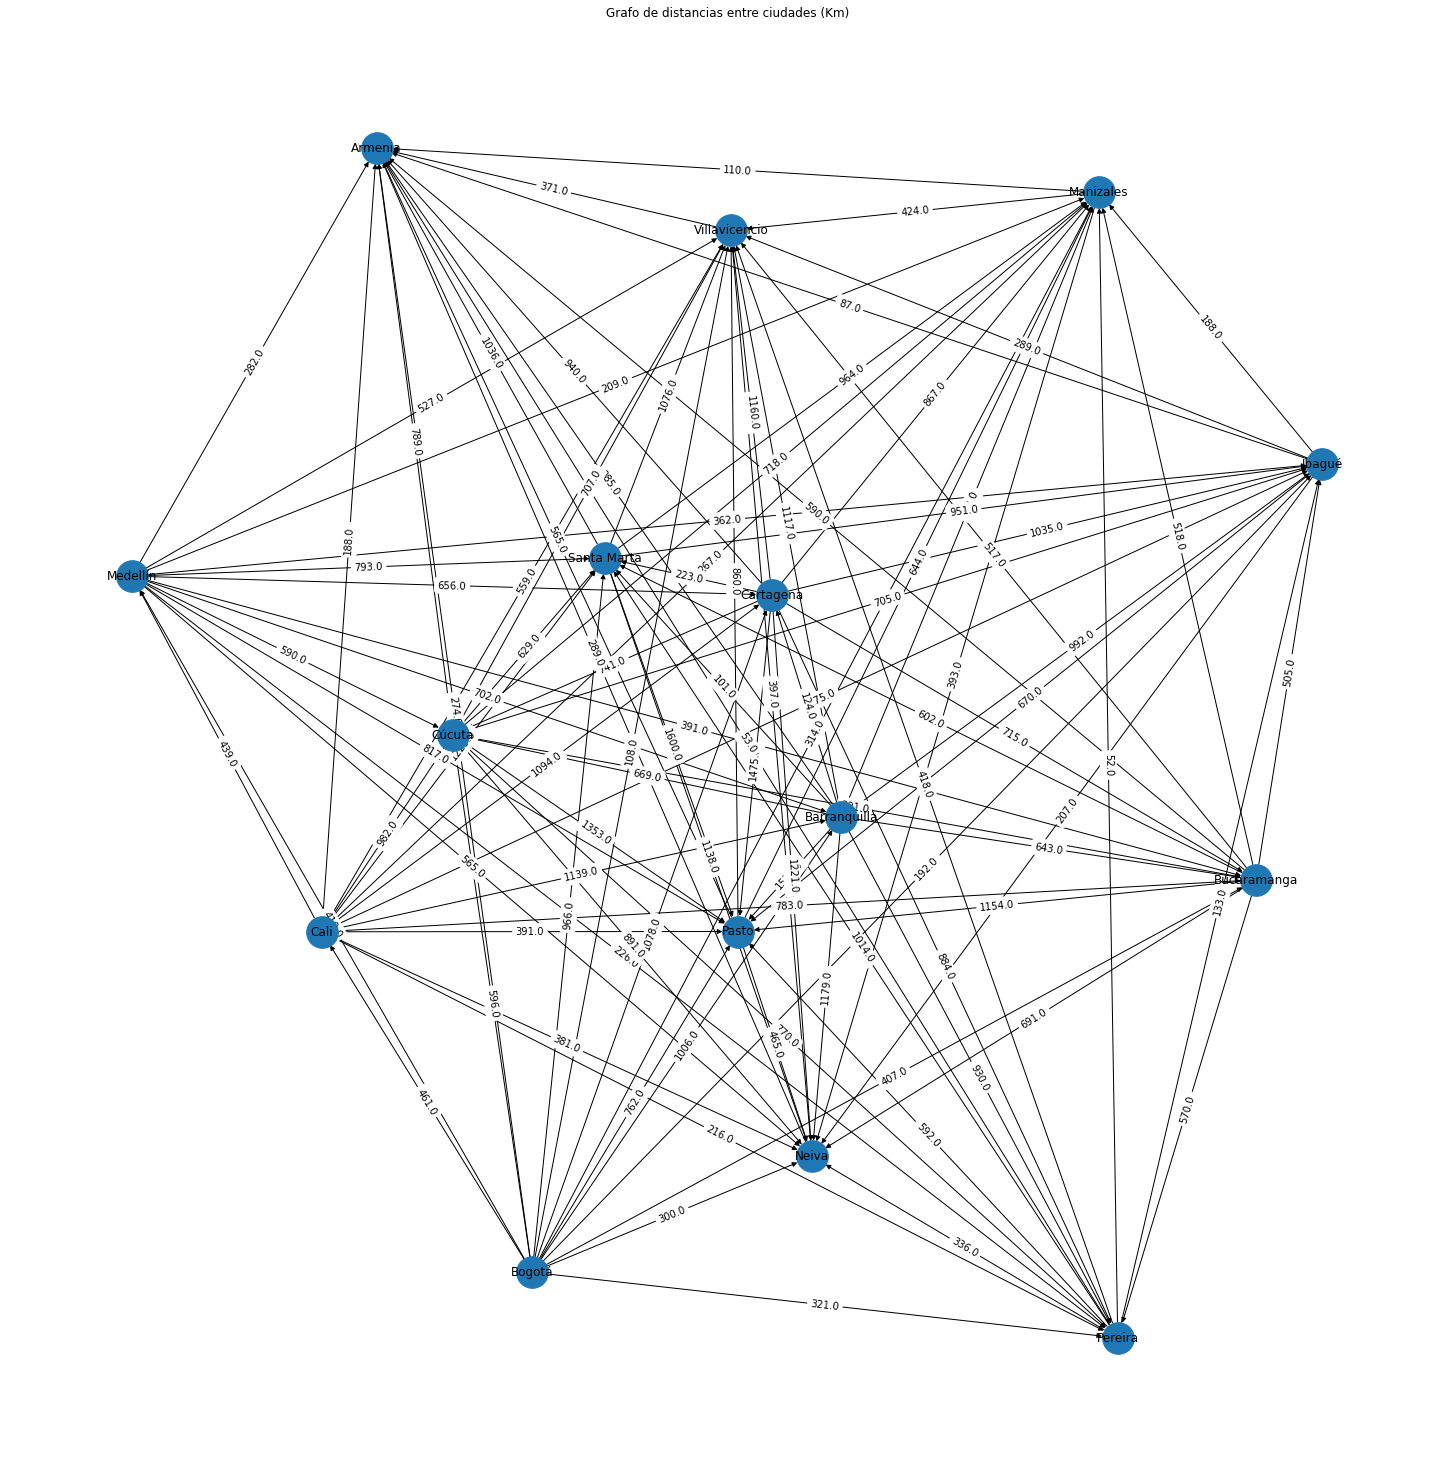

In [ ]:
#Se dibuja el de distancias
GD_new = nx.relabel_nodes(GD, dic) #Se reemplazan los números por las ciudades como nodos
draw_graf(GD_new)
plt.title("Grafo de distancias entre ciudades (Km)")
plt.show()

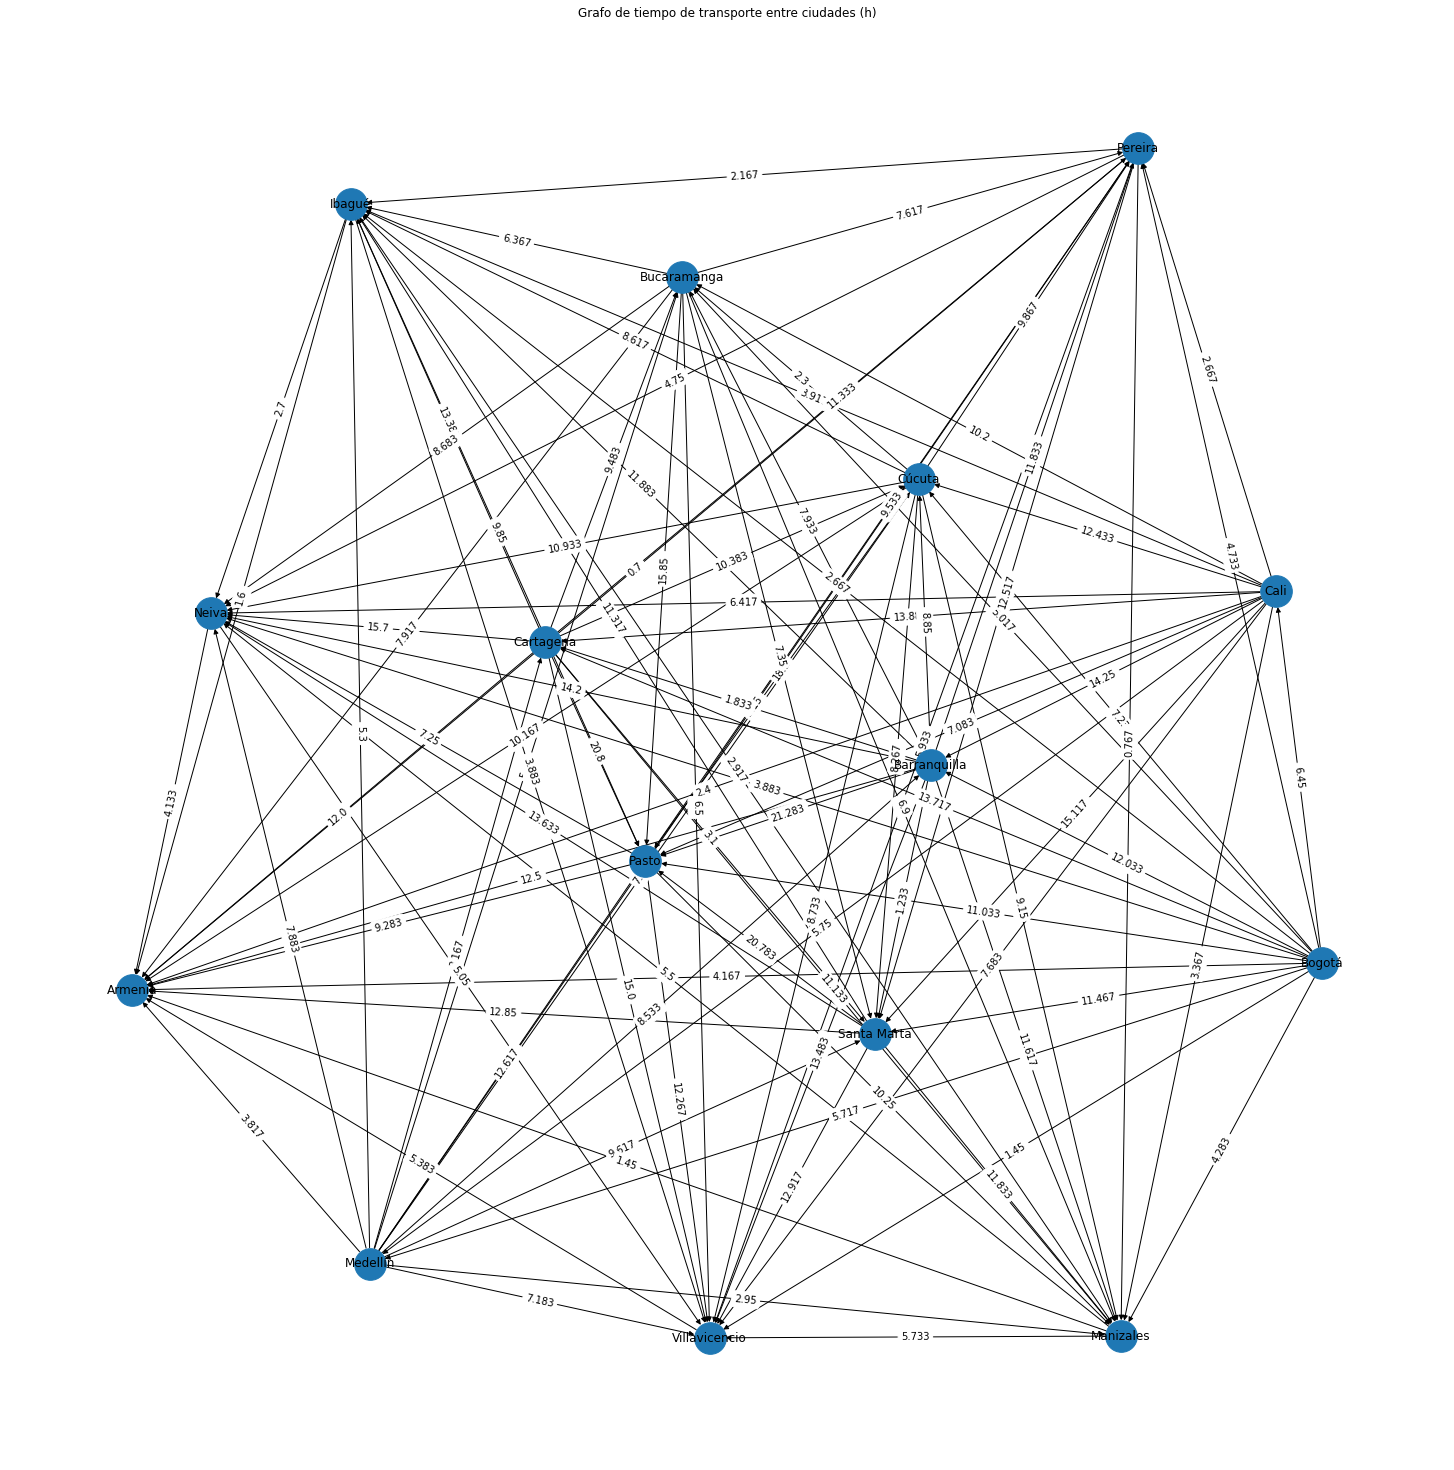

In [ ]:
#Se dibuja el de tiempos
GT_new = nx.relabel_nodes(GT, dic) #Se reemplazan los números por las ciudades como nodos

draw_graf(GT_new)
plt.title("Grafo de tiempo de transporte entre ciudades (h)")
plt.show()

In [ ]:
#Se usa API para obtener coordenadas de ciudades
def get_coordinates(city):
    geolocator = Nominatim(user_agent="MyApp")
    location = geolocator.geocode(city + ", Colombia")
    return(location.latitude, location.longitude)

In [ ]:
def draw_graf_country(G):
    plt.figure(figsize = (40,40))
    m = Basemap(
            projection='merc', #modelo de mapa
            llcrnrlon=-80, #coordenadas de esquinas
            llcrnrlat=-3,
            urcrnrlon=-66,
            urcrnrlat=13,
            lat_ts=0,
            resolution='h', #Alta resolución
            suppress_ticks=True)
    pos = {}
    for i in ciudades:
        coord = get_coordinates(i) #se le asignan coordenadas a las ciudades
        x, y = m(coord[1], coord[0])
        pos[i] = (x, y)  
    #Se dibuja el mapa y grafo
    m.drawcountries()
    m.drawstates()
    m.drawcoastlines()
    m.drawmapboundary(fill_color='aqua')
    m.fillcontinents(color='coral',lake_color='aqua')
    nx.draw(G,pos, arrows = True, node_size = 300, with_labels=True)
    nx.draw_networkx_edge_labels(G,pos, nx.get_edge_attributes(G, 'weight'))

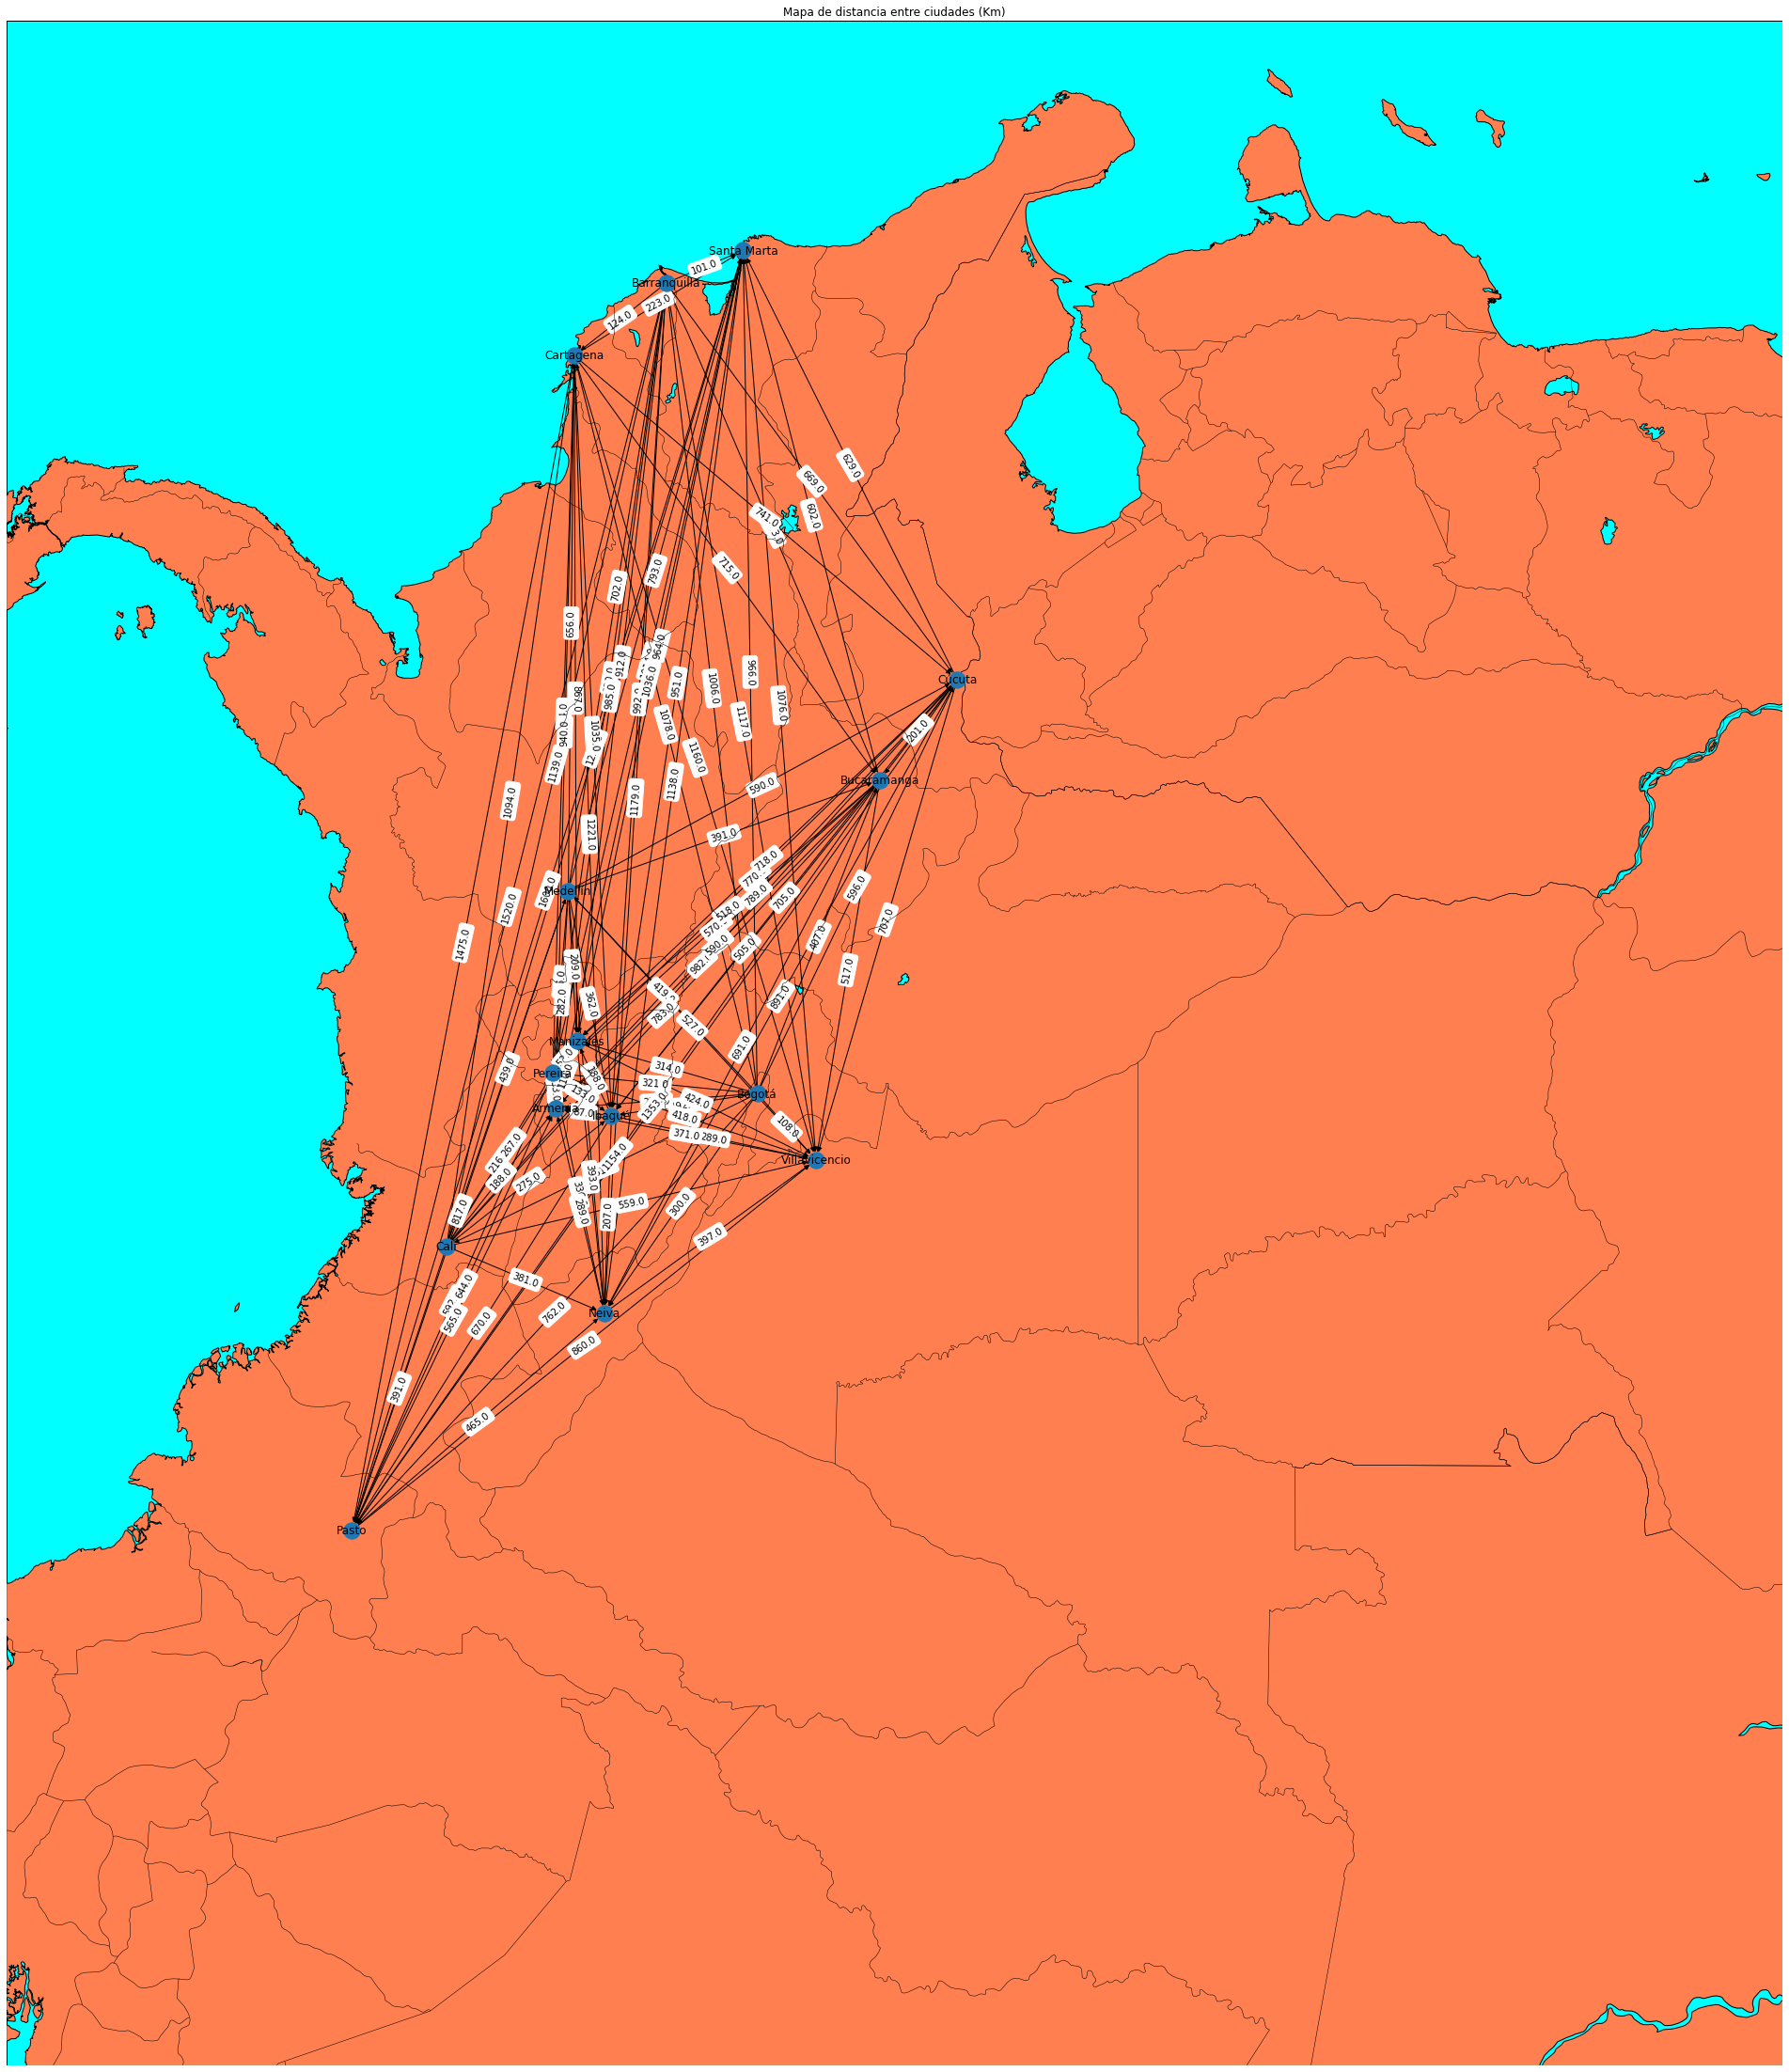

In [ ]:
#se dibuja el mapa de distancias
draw_graf_country(GD_new)
plt.title("Mapa de distancia entre ciudades (Km)")
plt.show()

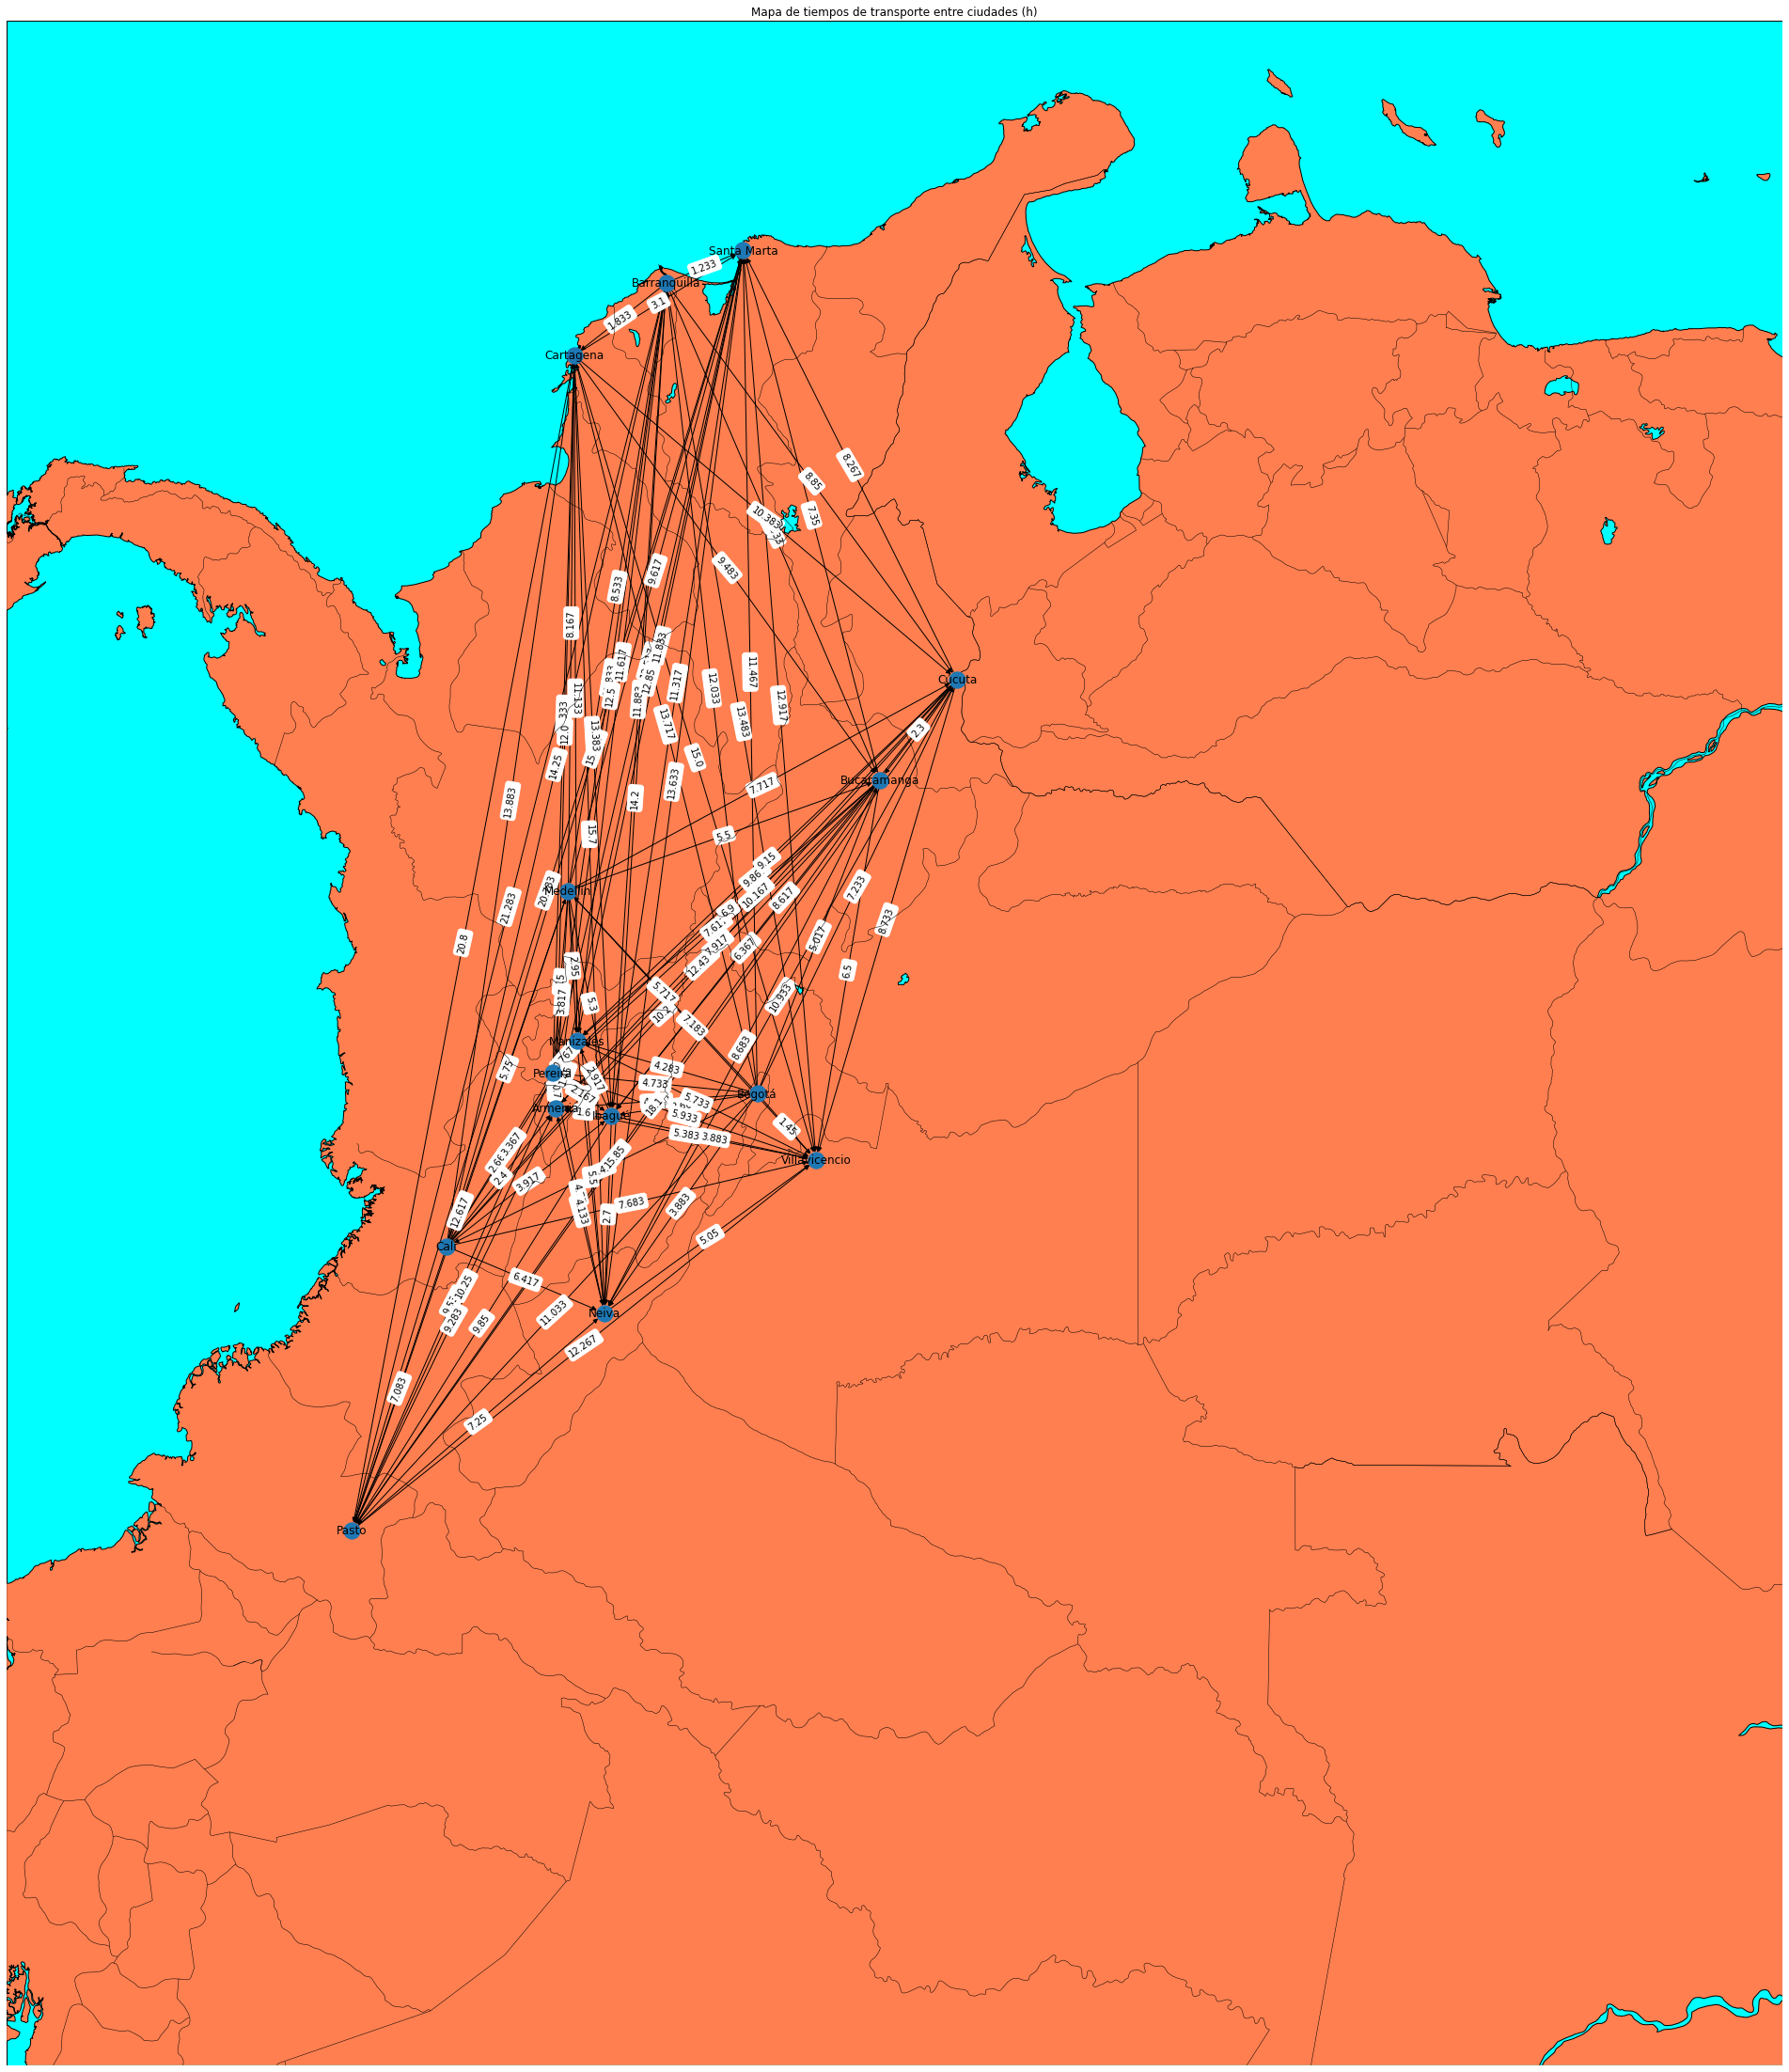

In [ ]:
#se dibuja el mapa de tiempos
draw_graf_country(GT_new)
plt.title("Mapa de tiempos de transporte entre ciudades (h)")
plt.show()

In [ ]:
def trans(lista): #Convierte lista de nodos a sus correspondientes ciudades
    new_lista = []
    for i in lista:
        new_lista.append(dic[i]) #Crea nueva lista con valores de ciudades en diccionariio, según índice
    return(new_lista)

In [ ]:
# Implementación del Algortimo Dijkstra para encontrar el camino mas corto entre distancias y tiempos:
import time                                         
first_time = time.time()                            
def dijsktra(Grafo, Nodos):                         
    
    grafo = nx.to_dict_of_lists(Grafo)              # Se retorna en una lista todos los nodos adyacentes a cada nodo 
    #print(grafo)                                    
    S = []; Queue = [];                             #Se crean la lista camino de los nodos "S" y una cola Queue vacías
    anterior = [0 for i in range(max(grafo)+1)];    
    distancia = [0 for i in range(max(grafo)+1)]    
    
    for nodo in grafo:                              #Iteración de los nodos en el grafo
        distancia[nodo] = 10000
        Queue.append(nodo)
        
    distancia[Nodos[0]] = 0                         #Se pone en distacias en cero
    
    while not len(Queue) == 0:
        distancia_minima = 10000
        for nodo in Queue:
            if distancia[nodo] < distancia_minima:
                distancia_minima = distancia[nodo]  #La distancia mínima será la distancia actual del nodo en la iteración
                nodo_temporal = nodo                
        nodo_distancia_minima = nodo_temporal
        Queue.remove(nodo_distancia_minima)
        
        for vecino in grafo[nodo_distancia_minima]:
            if distancia[nodo_distancia_minima] == 10000:
                distancia_temporal = 0                    
            else:
                distancia_temporal = distancia[nodo_distancia_minima]  #Se valida la distancia minima para asignarla en distancia temporal
            distancia_con_peso = distancia_temporal + Grafo[nodo_distancia_minima][vecino]['weight']
            if distancia_con_peso < distancia[vecino]:
                distancia[vecino] = distancia_con_peso
                anterior[vecino] = nodo_distancia_minima
                
        if nodo_distancia_minima == Nodos[1]:
            if anterior[nodo_distancia_minima] != 0 or nodo_distancia_minima == Nodos[0]:
                while nodo_distancia_minima != 0:
                    S.insert(0, nodo_distancia_minima)
                    nodo_distancia_minima = anterior[nodo_distancia_minima]
                print(distancia_con_peso)
                return S
            
print(f"Camino mas corto en distancia: {trans(dijsktra(GD, (6, 10)))}")
print(f"Camino más corto en tiempo: {trans(dijsktra(GT, (6, 10)))}")
end_time = time.time()
print(f"Tiempo de ejecución: {end_time-first_time}")

1719.0
Camino mas corto en distancia: ['Bucaramanga', 'Pasto']
25.133
Camino más corto en tiempo: ['Bucaramanga', 'Pasto']
Tiempo de ejecución: 0.0017328262329101562


In [ ]:
# Usando las herramientas de la librería Networkx
first_time = time.time()

print(trans(list(nx.all_shortest_paths(GT, source=6, target=10))[0]))
print(trans(list(nx.all_shortest_paths(GD, source=6, target=10))[0]))

end_time = time.time()
print(f"Tiempo de ejecución: {end_time-first_time}")


['Bucaramanga', 'Pasto']
['Bucaramanga', 'Pasto']
Tiempo de ejecución: 0.0039038658142089844


In [ ]:
first_time = time.time()

print(trans(list(nx.dijkstra_path(GD, source=6, target=10))))
print(trans(list(nx.dijkstra_path(GT, source=6, target=10))))

end_time = time.time()
print(f"Tiempo de ejecución: {end_time-first_time}")

['Bucaramanga', 'Pasto']
['Bucaramanga', 'Pasto']
Tiempo de ejecución: 0.005417346954345703
